# XOR and Range Testing


In [26]:
import numpy as np
import subprocess
from typing import List


def sample_distribution(run_cmd: List[str], period: int, n_repeat: int) -> np.ndarray:
    """Run the calculation n_repeat times, to sample the distribution of numbers"""
    
    repeats = {str(i): 0 for i in range(0, period )}

    for i in range(n_repeat):
        result = subprocess.run(run_cmd, capture_output=True, check=True, encoding="utf-8")
        values = result.stdout.split('\n')[1:-1]
        for value in values:
            repeats[value.strip()] += 1

    frequency = np.empty(shape=(period))
    for i in range(0, period):
        frequency[i] = repeats[str(i)]
    
    return frequency


In [ ]:
# Naive implementation




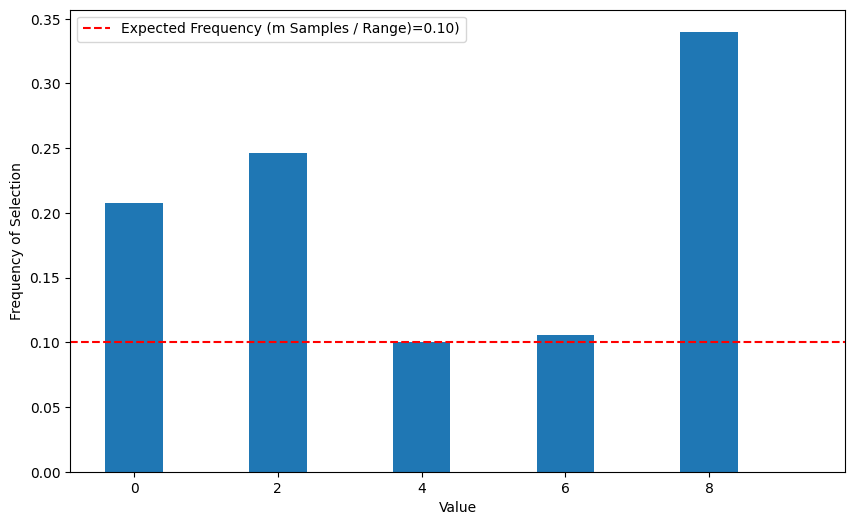

 Using the efficient implementation
           8


Biased entirely to even numbers, with poor uniformity
Tested XOR and that gives a spread of odd and even, so must be this implementation.
Same deal with the more efficient implementation, which means I've probably missed some subtlety
when transcribing from C to fortran.


In [35]:
## Lemire's Simple Algorithm
import matplotlib.pyplot as plt

n_sample = 1
period = 10
run = ['../cmake-build/test_lemire_routines', str(n_sample), str(period), 'simple']
n_repeat = 1000

expected_frequency = (n_sample / period)
frequency = sample_distribution(run, period, n_repeat)
frequency = frequency / float(n_repeat)

plt.figure(figsize=(10, 6))
plt.bar(range(0, len(frequency)), frequency)
plt.xlabel('Value')
plt.ylabel('Frequency of Selection')
plt.axhline(y=expected_frequency, color='r', linestyle='--', label=f'Expected Frequency (m Samples / Range)={expected_frequency:.2f})') 
plt.legend()
plt.show()

result = subprocess.run(['../cmake-build/test_lemire_routines', str(1), str(10), 'efficient'], capture_output=True, check=True, encoding="utf-8")
print(result.stdout)

note = """
Biased entirely to even numbers, with poor uniformity
Tested XOR and that gives a spread of odd and even, so must be this implementation.
Same deal with the more efficient implementation, which means I've probably missed some subtlety
when transcribing from C to fortran.
"""
print(note)

In [42]:
import gfort2py as gf

reservoir_m = gf.fFort('../cmake-build/libisdff90.dylib', '../cmake-build/modules/reservoir_sampling_m.mod')

random_numbers = np.empty(shape=(10))
random_numbers = reservoir_m.reservoir_sampling_algorithml(10, 100, 123, random_numbers)

print(random_numbers)


Result(result=None, args={'m': 10, 'n': 100, 'seed': 395505749, 'reservoir': array([46,  2, 90, 84, 91, 88, 69, 55, 52, 15], dtype=int32)})
